<a href="https://colab.research.google.com/github/karthik-653/Climate-Change-Analysis/blob/main/Sarima_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the necessary modules**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from math import sqrt
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Assigning path
data_path = '/content/drive/MyDrive/Datasets/GlobalLandTemperaturesByCountry.csv'

In [ ]:
#Reading the CSV file
df=pd.read_csv(data_path)

In [ ]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [ ]:
print(df['Country'].unique())

['Åland' 'Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antarctica' 'Antigua And Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Baker Island' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bonaire, Saint Eustatius And Saba' 'Bosnia And Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Bulgaria' 'Burkina Faso' 'Burma'
 'Burundi' "Côte D'Ivoire" 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Christmas Island' 'Colombia' 'Comoros'
 'Congo (Democratic Republic Of The)' 'Congo' 'Costa Rica' 'Croatia'
 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic' 'Denmark (Europe)' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Europe'
 'Falkland Islands (Islas Malvinas)' 'Faroe Islands'
 'Federated States Of

In [ ]:
#Creating a dataframe consisting temperatures of INDIA alone
india = df.loc[df['Country'] == 'India']

In [ ]:
india.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
243695,1796-01-01,17.044,2.044,India
243696,1796-02-01,19.193,1.359,India
243697,1796-03-01,22.319,2.125,India
243698,1796-04-01,27.233,1.510,India
243699,1796-05-01,30.035,1.338,India


In [ ]:
india = india.drop(['AverageTemperatureUncertainty', 'Country'], axis=1)

In [ ]:
india['dt'] = pd.to_datetime(india['dt'])
india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2613 entries, 243695 to 246307
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   dt                  2613 non-null   datetime64[ns]
 1   AverageTemperature  2508 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 61.2 KB


In [ ]:
india['AverageTemperature'].isna().sum()

105

In [ ]:
#Making all mean values to average
mean_temp = india['AverageTemperature'].mean()
india['AverageTemperature'].fillna(mean_temp, inplace=True)

In [ ]:
india['AverageTemperature'].isna().sum()

0

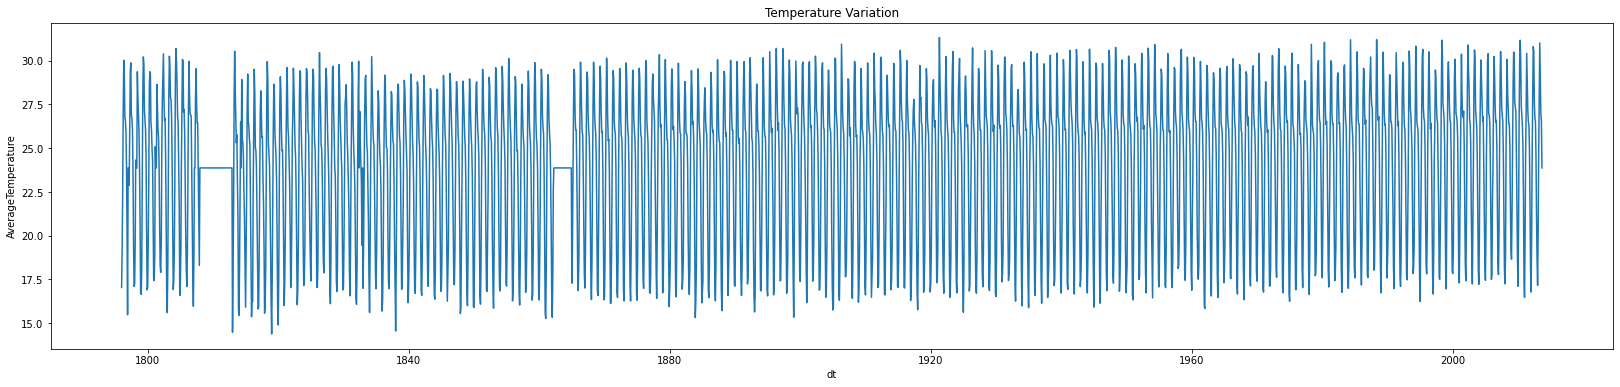

In [ ]:
plt.figure(figsize=(28,6))
sns.lineplot(x=india['dt'], y=india['AverageTemperature'])
plt.title('Temperature Variation')
plt.show()


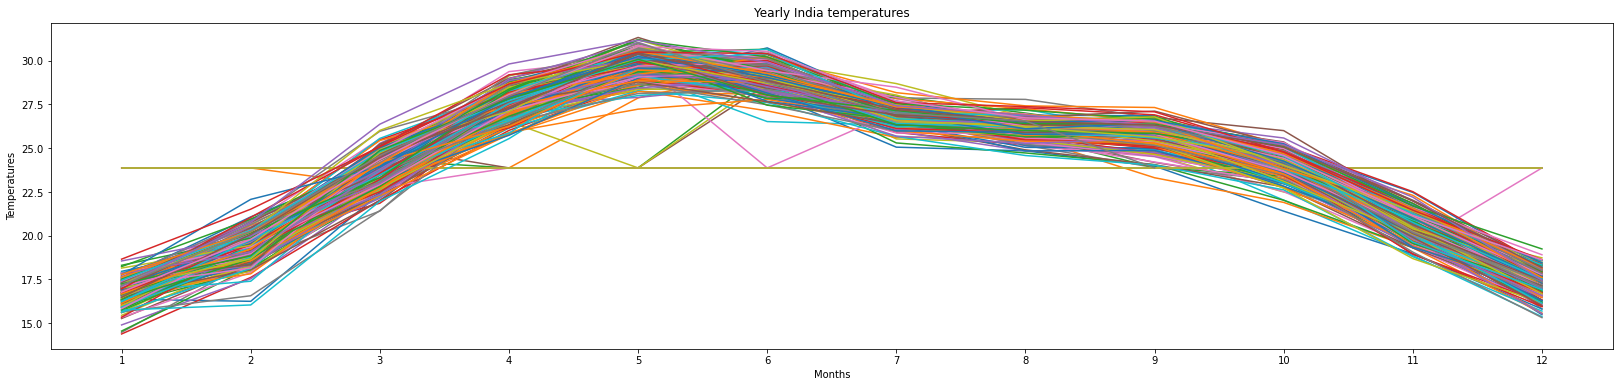

In [ ]:
#Constructing a pivot table to see variation of temperatures on every month for every year
india['month']=india['dt'].dt.month
india['year']=india['dt'].dt.year
pivot = pd.pivot_table(india, values='AverageTemperature', index='month', columns='year', aggfunc='mean')
pivot.plot(figsize=(28,6))
plt.title('Yearly India temperatures')
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()


From the above pivot table, it is clearly visible that the temperature begins to rise in the beginning of march, peaks at the month of May and gradually reduces until September/October, and drastic reduce in the month of November, December and January. 

To visualize this in a much better way, let us see a mean of monthly temperatures of every year.

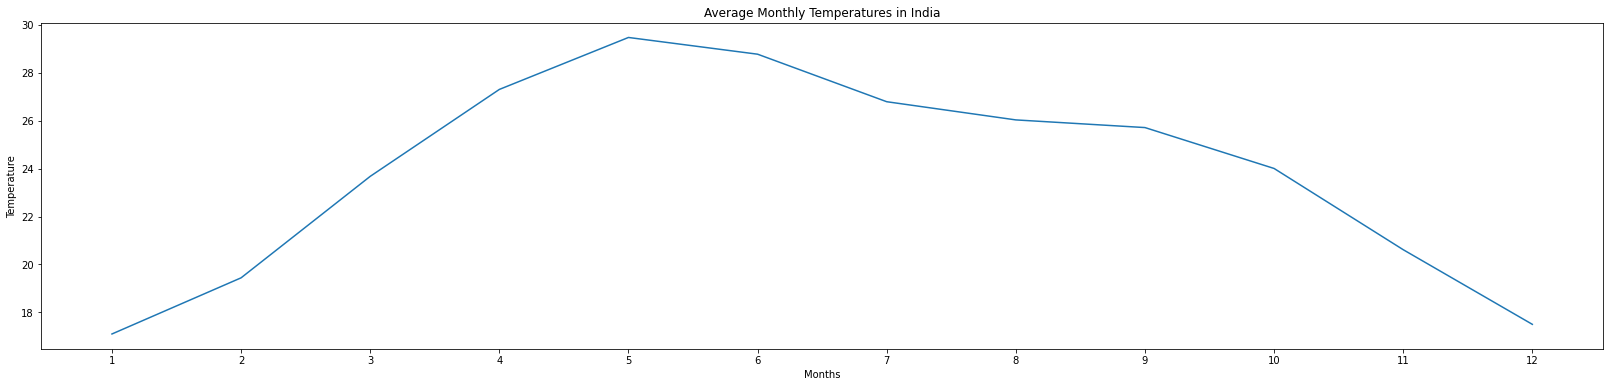

In [ ]:
Average_monthly_Temperature = pivot.mean(axis=1)
Average_monthly_Temperature.plot(figsize=(28,6))
plt.title('Average Monthly Temperatures in India')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()


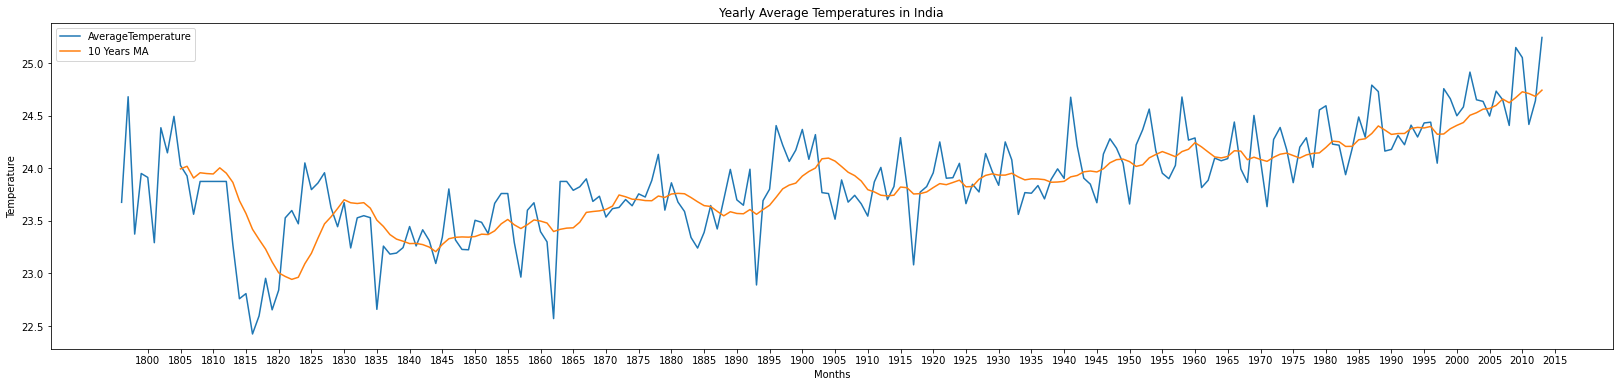

In [ ]:
year_avg = pd.pivot_table(india, values='AverageTemperature', index='year', aggfunc='mean')
year_avg['10 Years MA'] = year_avg['AverageTemperature'].rolling(10).mean()
year_avg[['AverageTemperature','10 Years MA']].plot(figsize=(28,6))
plt.title('Yearly Average Temperatures in India')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1800,2016,5)])
plt.show()


In [ ]:
start_year_temp = year_avg.loc[1980, 'AverageTemperature']
end_year_temp = year_avg.loc[2010, 'AverageTemperature']
percentage_difference = ((end_year_temp - start_year_temp) / start_year_temp) * 100
print("The percentage Average Temperature difference between 1980 and 2015 is: ", percentage_difference,"%")

The percentage Average Temperature difference between 1980 and 2015 is:  1.8612956895061843 %


In [ ]:
india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2613 entries, 243695 to 246307
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   dt                  2613 non-null   datetime64[ns]
 1   AverageTemperature  2613 non-null   float64       
 2   month               2613 non-null   int64         
 3   year                2613 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 102.1 KB


In [ ]:
train = india[:-120].copy()
val = india[-120:-36].copy()
test = india[-36:].copy()

In [ ]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('India Temperature Variation')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Results of Dickey-Fuller Test:
Test Statistic                   -4.9813
p-value                           0.0000
Lags Used                        25.0000
Number of Observations Used    2467.0000
Critical Value (1%)              -3.4330
Critical Value (5%)              -2.8627
Critical Value (10%)             -2.5674
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


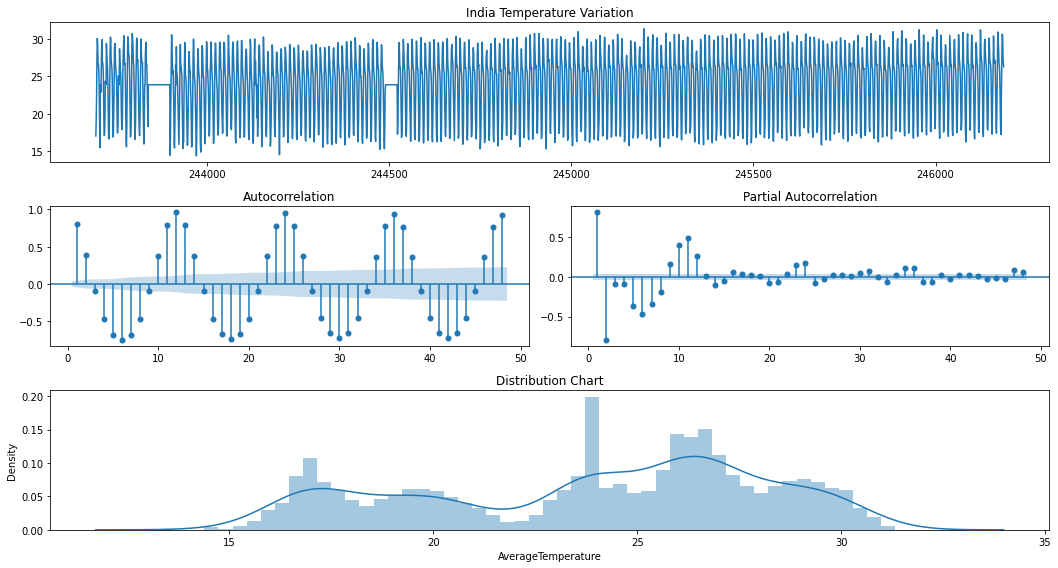

In [ ]:
check_stationarity(train['AverageTemperature'])

In [ ]:
def walk_forward(training_set, validation_set, params):
    '''
    Params: it's a tuple where you put together the following SARIMA parameters: ((pdq), (PDQS), trend)
    '''
    history = [x for x in training_set.values]
    prediction = list()
    
    # Using the SARIMA parameters and fitting the data
    pdq, PDQS, trend = params

    #Forecasting one period ahead in the validation set
    for week in range(len(validation_set)):
        model = sm.tsa.statespace.SARIMAX(history, order=pdq, seasonal_order=PDQS, trend=trend)
        result = model.fit(disp=False)
        yhat = result.predict(start=len(history), end=len(history))
        prediction.append(yhat[0])
        history.append(validation_set[week])
        
    return prediction

In [ ]:
train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)

# Call the walk_forward function
val['Pred'] = walk_forward(train['AverageTemperature'], val['AverageTemperature'], ((3,0,0),(0,1,1,12),'c'))

In [ ]:
val['Pred']

0     24.658654
1     21.291629
2     18.136195
3     17.388606
4     19.906166
        ...    
79    31.295177
80    29.591960
81    27.401289
82    26.636721
83    26.573623
Name: Pred, Length: 84, dtype: float64

In [ ]:

rmse_pred = sqrt(mean_squared_error(val['AverageTemperature'],val['Pred']))
print(f"The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was {round(rmse_pred,4)} celsius degrees")

The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was 0.6225 celsius degrees


In [ ]:
val['Error'] = val['AverageTemperature'] - val['Pred']

In [ ]:
def plot_error(data, figsize=(20,8)):
    '''
    There must have 3 columns following this order: Temperature, Prediction, Error
    '''
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    #Plotting the Current and Predicted values
    ax1.plot(data.iloc[:,1:3])
    ax1.legend(['Real','Pred'])
    ax1.set_title('Current and Predicted Values')
    
    # Residual vs Predicted values
    ax2.scatter(data.iloc[:,1], data.iloc[:,2])
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Errors')
    ax2.set_title('Errors versus Predicted Values')
    
    ## QQ Plot of the residual
    sm.graphics.qqplot(data.iloc[:,2], line='r', ax=ax3)
    
    # Autocorrelation plot of the residual
    plot_acf(data.iloc[:,2], lags=(len(data.iloc[:,2])-1),zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()

In [ ]:
val.drop(['month','year'], axis=1, inplace=True)
val.head()

KeyError: ignored

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


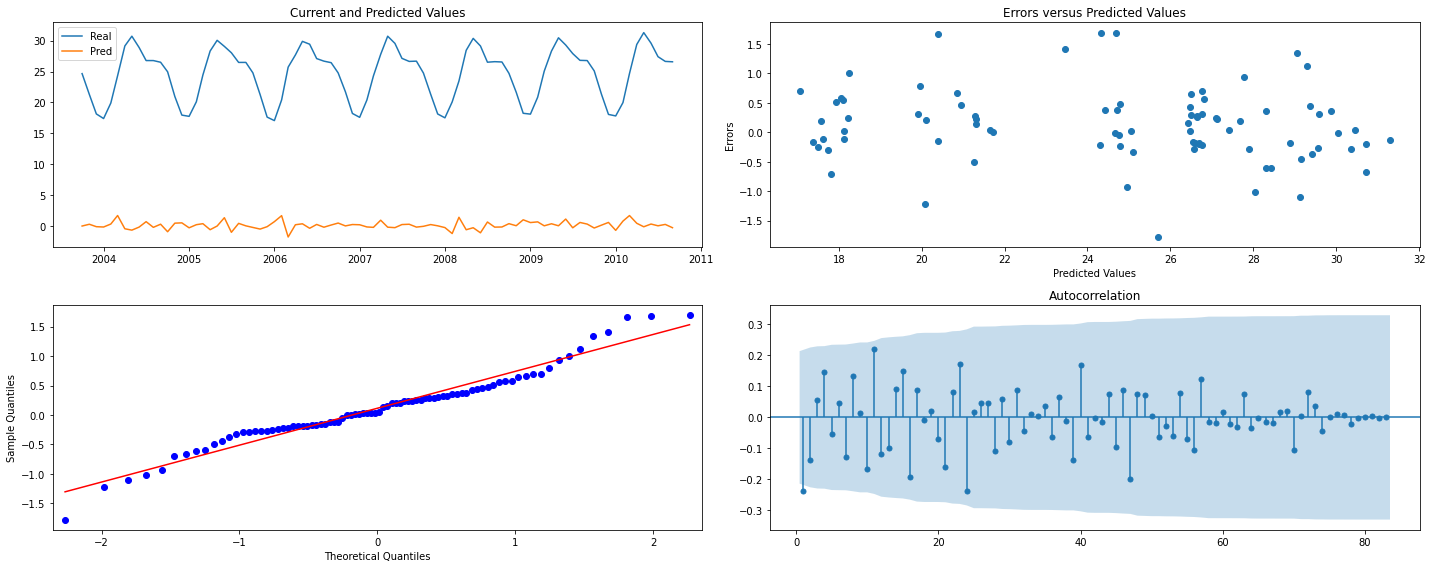

In [ ]:
plot_error(val)

In [ ]:
train = train.set_index('dt')
val = val.set_index('dt')

In [ ]:
future = pd.concat([train['AverageTemperature'], val['AverageTemperature']])
future.head()

dt
1796-01-01    17.044
1796-02-01    19.193
1796-03-01    22.319
1796-04-01    27.233
1796-05-01    30.035
Name: AverageTemperature, dtype: float64

In [ ]:
future

dt
1796-01-01    17.044
1796-02-01    19.193
1796-03-01    22.319
1796-04-01    27.233
1796-05-01    30.035
               ...  
2010-05-01    31.169
2010-06-01    29.908
2010-07-01    27.433
2010-08-01    26.892
2010-09-01    26.296
Name: AverageTemperature, Length: 2577, dtype: float64

In [ ]:
model = sm.tsa.statespace.SARIMAX(future, order=(3,0,0), seasonal_order=(0,1,1,12), trend='c')
result = model.fit(disp=False)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [ ]:
#forecast_periods = 13
#pred = result.get_prediction(start=len(future), end=len(future)+forecast_periods-1, dynamic=True)
#test['Pred'] = pred.predicted_mean

In [ ]:
test['Pred'] = result.predict(start=(len(future)), end=(len(future)+35))
test['Pred']

dt
2010-10-01    24.622272
2010-11-01    21.315641
2010-12-01    18.134168
2011-01-01    17.482824
2011-02-01    20.285259
2011-03-01    24.585890
2011-04-01    28.238367
2011-05-01    30.381393
2011-06-01    29.399848
2011-07-01    27.331163
2011-08-01    26.713735
2011-09-01    26.523698
2011-10-01    24.781328
2011-11-01    21.444462
2011-12-01    18.181776
2012-01-01    17.490503
2012-02-01    20.272661
2012-03-01    24.573109
2012-04-01    28.231571
2012-05-01    30.381424
2012-06-01    29.404157
2012-07-01    27.337219
2012-08-01    26.719835
2012-09-01    26.529171
2012-10-01    24.786143
2012-11-01    21.448861
2012-12-01    18.186012
2013-01-01    17.494739
2013-02-01    20.276959
2013-03-01    24.577471
2013-04-01    28.235973
2013-05-01    30.385842
2013-06-01    29.408574
2013-07-01    27.341631
2013-08-01    26.724240
2013-09-01    26.533572
Name: Pred, dtype: float64

nan

In [ ]:
test = test.set_index('dt')

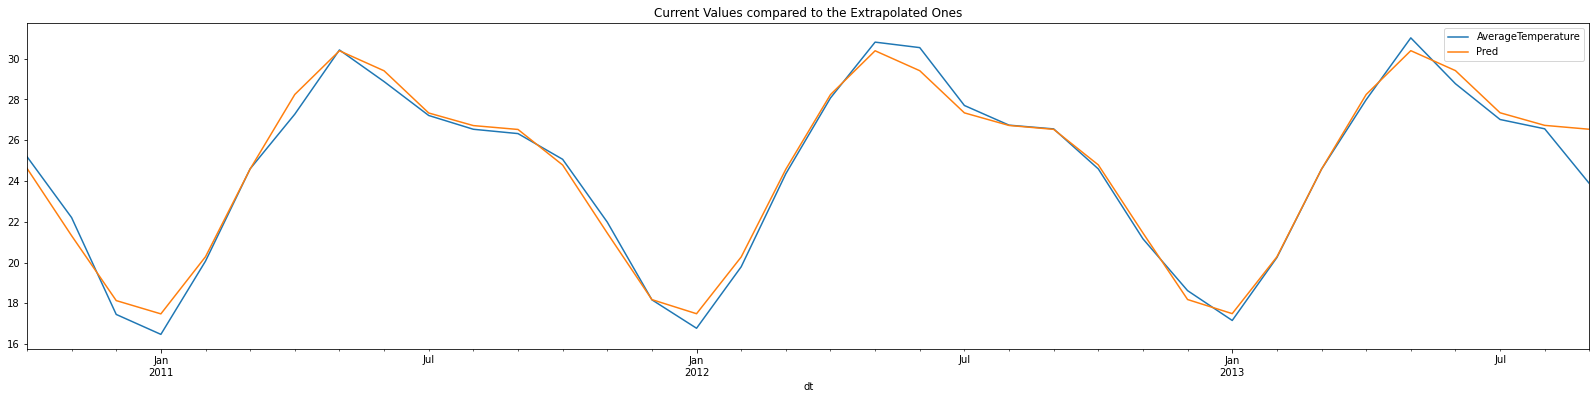

In [ ]:
test[['AverageTemperature', 'Pred']].plot(figsize=(28,6))
plt.title('Current Values compared to the Extrapolated Ones')
plt.show()